In [2]:
%matplotlib inline

In [3]:
# pip install geopandas plotly descartes

In [4]:
from matplotlib import pyplot as plt
from matplotlib import patches
import matplotlib
import pandas as pd
import geopandas # we'll use this to read shapefiles
import numpy as np
from shapely.geometry import Polygon, Point, shape
df = pd.read_csv('Madison_crash_2009_2019.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df['ACCDDATE'] = pd.to_datetime(df['ACCDDATE'])
inj = df[df["ACCDTYPE"] == "BIKE"].reset_index()
inj.head()

,index,DOCTNMBR,ACCDDATE,NTFYHOUR,REGION,COUNTY,MUNICIPALITY,MUNITYPE,ONHWYRP,ONHWYDIR,...,POSTSPD2,AGE2,SEX2,INJSVR2,SAFETY2,DRVRPC2,STNM21,STNM22,WISLR_LATDECDG,WISLR_LONDECDG
0,1348,9BGG3T2,2010-09-22,15,SW,DANE,MADISON,C,12.0,E,...,0.0,47.0,M,C,NaN,NaN,,,43.033278,-89.407738
1,1475,9BL0RRV,2012-01-09,10,SW,DANE,MADISON,C,12.0,E,...,15.0,53.0,M,,HLMT,NaN,,,43.033609,-89.407500
2,1485,9BFSV9J,2011-05-13,22,SW,DANE,MADISON,C,12.0,E,...,30.0,41.0,M,B,NONE,FTY,346.37 1 C 3,,43.033609,-89.407500
3,1753,9BBVPQD,2011-06-25,21,SW,DANE,MADISON,C,12.0,E,...,30.0,23.0,F,,EYE,NaN,,,43.039670,-89.378781
4,2158,9BD8644,2014-07-15,7,SW,DANE,MADISON,C,12.0,E,...,77.0,25.0,M,B,HLMT,NaN,,,43.045449,-89.306499


In [6]:
inj['loc'] = ""
for i in range(len(inj)):
    if np.isnan(inj.WISLR_LATDECDG[i]) or np.isnan(inj.WISLR_LONDECDG[i]):
        inj["loc"][i] = None
    else:
        inj["loc"][i] = Point(inj.WISLR_LONDECDG[i],inj.WISLR_LATDECDG[i])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
inj = inj.dropna(subset=['loc'])
inj = geopandas.GeoDataFrame(inj, geometry='loc')
inj

,index,DOCTNMBR,ACCDDATE,NTFYHOUR,REGION,COUNTY,MUNICIPALITY,MUNITYPE,ONHWYRP,ONHWYDIR,...,AGE2,SEX2,INJSVR2,SAFETY2,DRVRPC2,STNM21,STNM22,WISLR_LATDECDG,WISLR_LONDECDG,loc
0,1348,9BGG3T2,2010-09-22,15,SW,DANE,MADISON,C,12.0,E,...,47.0,M,C,NaN,NaN,,,43.033278,-89.407738,POINT (-89.40774 43.03328)
1,1475,9BL0RRV,2012-01-09,10,SW,DANE,MADISON,C,12.0,E,...,53.0,M,,HLMT,NaN,,,43.033609,-89.407500,POINT (-89.40750 43.03361)
2,1485,9BFSV9J,2011-05-13,22,SW,DANE,MADISON,C,12.0,E,...,41.0,M,B,NONE,FTY,346.37 1 C 3,,43.033609,-89.407500,POINT (-89.40750 43.03361)
3,1753,9BBVPQD,2011-06-25,21,SW,DANE,MADISON,C,12.0,E,...,23.0,F,,EYE,NaN,,,43.039670,-89.378781,POINT (-89.37878 43.03967)
4,2158,9BD8644,2014-07-15,7,SW,DANE,MADISON,C,12.0,E,...,25.0,M,B,HLMT,NaN,,,43.045449,-89.306499,POINT (-89.30650 43.04545)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,53706,A024348,2009-08-26,23,SW,DANE,MADISON,C,NaN,NaN,...,29.0,M,B,NONE,NaN,,,43.092039,-89.355198,POINT (-89.35520 43.09204)
536,53739,01L091L4FS,2017-08-07,9,SW,DANE,MADISON,C,NaN,NaN,...,41.0,F,,SH/LP,NaN,NaN,NaN,43.088443,-89.357984,POINT (-89.35798 43.08844)
537,53778,01L0GMH5JZ,2018-09-03,14,SW,DANE,MADISON,C,NaN,NaN,...,40.0,M,B,NaN,NaN,NaN,NaN,43.091083,-89.355932,POINT (-89.35593 43.09108)
538,54063,9B6T74R,2015-08-21,7,SW,DANE,MADISON,C,NaN,NaN,...,20.0,F,B,NaN,NaN,,,43.146176,-89.371107,POINT (-89.37111 43.14618)


In [18]:
roads = geopandas.read_file("Madison-shp/shape/roads.shp")
roads.head()

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
0,4705464,Mineral Point Road,None,secondary,1,0,NaN,"LINESTRING (-89.50267 43.06062, -89.50253 43.0..."
1,4709908,None,I 39;I 90,motorway,1,0,70.0,"LINESTRING (-89.28577 43.11006, -89.28563 43.1..."
2,4709949,None,None,motorway_link,1,0,NaN,"LINESTRING (-89.29664 43.13685, -89.29682 43.1..."
3,4710035,None,None,motorway_link,1,0,NaN,"LINESTRING (-89.30082 43.13351, -89.30101 43.1..."
4,4710039,American Parkway,None,tertiary,1,0,NaN,"LINESTRING (-89.28261 43.14461, -89.28279 43.1..."


In [174]:
roads["type"].unique()

array(['secondary', 'trunk', 'primary', 'secondary_link', 'primary_link'],
      dtype=object)

In [19]:
cycle_way = roads[roads["type"] == "cycleway"]

filter_list = ['tertiary_link','cycleway',"residential",'bridleway','footway','construction','steps','footways','motorway_link','trunk_link','track','unclassified','pedestrian','steps','proposed',"construction",'tertiary','motorway','platform','corridor','service',"path"]
#big_list = ["residential"]

for f in filter_list:
    roads = roads[roads["type"] != f]
roads.head()
line_new = list(shape(roads["geometry"][0]).coords)
line_new
print(min(line_new),max(line_new))

(-89.5026705, 43.0606153) (-89.486514, 43.0607291)


In [20]:
roads["type"].unique()

array(['secondary', 'trunk', 'primary', 'secondary_link', 'primary_link'],
      dtype=object)

In [82]:
city = geopandas.read_file("City_Limit/City_Limit.shp")
lakes = geopandas.read_file("lakes/Potential_Standing_Water.shp")
bike_path = geopandas.read_file("Bike_Paths/Bike_Paths.shp")
bike_path["Status"].unique()

array(['Planned - Feasible', 'Existing', 'Programmed',
       'Planned - Obstacles', 'Conceptual', 'Under Construction',
       'Platted'], dtype=object)

In [90]:
expected_bike_path = bike_path[bike_path["Status"] != "Existing"]
expected_bike_path = bike_path[bike_path["Status"] != "Planned - Obstacles"]
existing_bike_path = bike_path[bike_path["Status"] == "Existing"]

In [75]:
def get_drop_list(gpdf):
    drop_list = []
    for i, line in enumerate(list(gpdf["geometry"])):
        try:
            line_new = list(shape(line).coords)
            if min(line_new)[0] < -89.5026705:
                drop_list.append(i)
            elif max(line_new)[0] > -89.256: 
                drop_list.append(i)
            elif min(line_new)[1] < 42.95:
                drop_list.append(i)
            elif max(line_new)[1] > 43.20: 
                drop_list.append(i)
        except:
            drop_list.append(i)
    return drop_list[:]

In [80]:
expected_drop_list = get_drop_list(expected_bike_path)
existing_drop_list = get_drop_list(existing_bike_path)
expected_bike_path.drop(expected_bike_path.index[expected_drop_list], inplace = True)
existing_bike_path.drop(existing_bike_path.index[existing_drop_list], inplace = True)
existing_bike_path

,OBJECTID,Off_Type,BFuncClass,Status,Year,Pri_Name,Sec_Name,Jurisdicti,Surface,BikePaWdth,...,created_us,created_da,last_edite,last_edi_1,DIR_INDC,BFuncCla_1,ShapeSTLen,MapOffset,ExtID,geometry
14,248693,Shared-Use Path,Secondary,Existing,1979,Sandburg Woods Bike Path,None,City of Madison,Paved,8.0,...,PLDMS,2014-03-13T19:05:24.000Z,PLDMS,2018-02-27T13:42:57.000Z,Primary,None,1512.907079,None,16.0,"LINESTRING (-89.30650 43.13886, -89.30650 43.1..."
15,248694,Pedestrian Path on Bike Network,None,Existing,None,None,None,City of Madison,Paved,8.0,...,PLDMS,2014-03-13T19:05:24.000Z,PLWJH,2018-06-05T14:07:21.000Z,Primary,None,176.265655,None,17.0,"LINESTRING (-89.30563 43.13953, -89.30570 43.1..."
16,248695,Pedestrian Path on Bike Network,Secondary,Existing,None,None,None,City of Madison,Paved,8.0,...,PLDMS,2014-03-13T19:05:24.000Z,PLWJH,2018-06-05T14:06:28.000Z,Primary,None,150.213609,None,18.0,"LINESTRING (-89.30695 43.13911, -89.30693 43.1..."
17,248696,Pedestrian Path on Bike Network,None,Existing,None,None,None,City of Madison,Paved,8.0,...,PLDMS,2014-03-13T19:05:24.000Z,PLWJH,2018-06-05T14:06:04.000Z,Primary,None,153.759286,None,19.0,"LINESTRING (-89.30792 43.13841, -89.30786 43.1..."
18,248697,Shared-Use Path,Secondary,Existing,1978,Warner Park Spur frm Monterey,None,City of Madison,Paved,8.0,...,PLDMS,2014-03-13T19:05:24.000Z,PLWJH,2018-05-14T15:04:26.000Z,Primary,None,778.238825,None,20.0,"LINESTRING (-89.37115 43.12606, -89.37035 43.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,251419,Shared-Use Path,None,Existing,None,None,None,None,Paved,10.0,...,PLWJH,2019-10-08T13:15:03.000Z,PLWJH,2019-10-08T13:15:40.000Z,Primary,None,420.322171,None,NaN,"LINESTRING (-89.33500 43.02850, -89.33347 43.0..."
2741,251420,Municipal Lot,None,Existing,None,None,None,None,Paved,10.0,...,PLWJH,2019-10-08T13:16:20.000Z,PLWJH,2019-10-08T13:17:04.000Z,Primary,None,1069.829276,None,NaN,"LINESTRING (-89.33347 43.02823, -89.33348 43.0..."
2742,251421,Shared-Use Path,None,Existing,None,None,None,None,Paved,10.0,...,PLWJH,2019-10-08T13:24:49.000Z,PLWJH,2019-10-08T13:24:49.000Z,Primary,None,58.286517,None,NaN,"LINESTRING (-89.36496 43.02249, -89.36511 43.0..."
2744,251423,Municipal Lot,Secondary,Existing,None,None,None,Village of McFarland,Paved,10.0,...,PLWJH,2019-10-10T15:12:59.000Z,PLWJH,2019-10-10T15:13:58.000Z,Primary,None,141.142065,None,443.0,"LINESTRING (-89.29528 43.00507, -89.29532 43.0..."


# Goal: Safer Biking Environment
## 1. Identify suggestions for new biker protecting facilities
- path
- bike lane (joined, seperate)

## 2. Prove
1. Current situation for the accident clustered roads
2. Difficulty for these roads
    - enough room?
    - already a bike lane there but didn't stop the accidents from happening?

## 3. Rank
Which ones are more ergent?
- Benefit: possible accident decreasement
- Cost: total length 

    

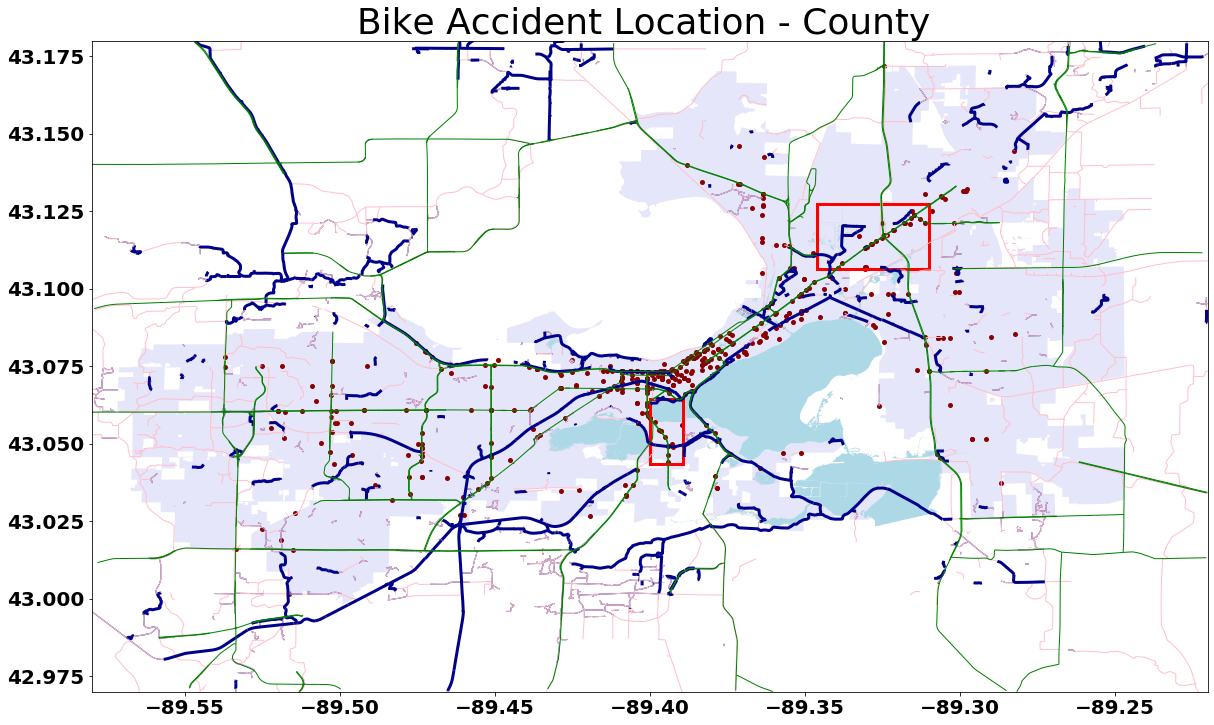

In [271]:
ax = city.plot(color="lavender", figsize=(20,20))
gdf = geopandas.GeoDataFrame(roads)
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
# ax.set_xlim(-89.45, -89.35)
# ax.set_ylim(43.025, 43.075)
font = {'weight' : 'bold',
        'size'   : 30}
matplotlib.rc('font', **font)
existing_bike_path.plot(color = "darkblue",ax=ax, lw = 1)
plt.title("Bike Accident Location - County ")
ax.tick_params(axis='both', which='major', labelsize=20)
p = patches.Rectangle((0.5, 0.35), 0.03, 0.1,
    fill=False, transform=ax.transAxes, clip_on=False
    ,color="red",lw = 3
    )
p2 = patches.Rectangle((0.65, 0.65), 0.1, 0.1,
    fill=False, transform=ax.transAxes, clip_on=False
    ,color="red",lw = 3
    )
ax.add_patch(p)
ax.add_patch(p2)

expected_bike_path.plot(color="pink", ax=ax, lw = 1)
lakes.plot(color="lightblue", ax=ax)
cycle_way.plot(color="darkblue", ax = ax, lw = 3)
roads.plot(color = "green",ax=ax, lw = 1)
inj.plot(color = "darkred",ax=ax, lw = 2, marker=".")


<p style="color:Blue">Blue Line</p>Bike paths   <p style="color:Green">Green Line</p>Primary roads   <p style="color:Pink">Pink Line</p>Planned Bike paths   <p style="color:DarkRed">Red Point</p>Bike Accidents


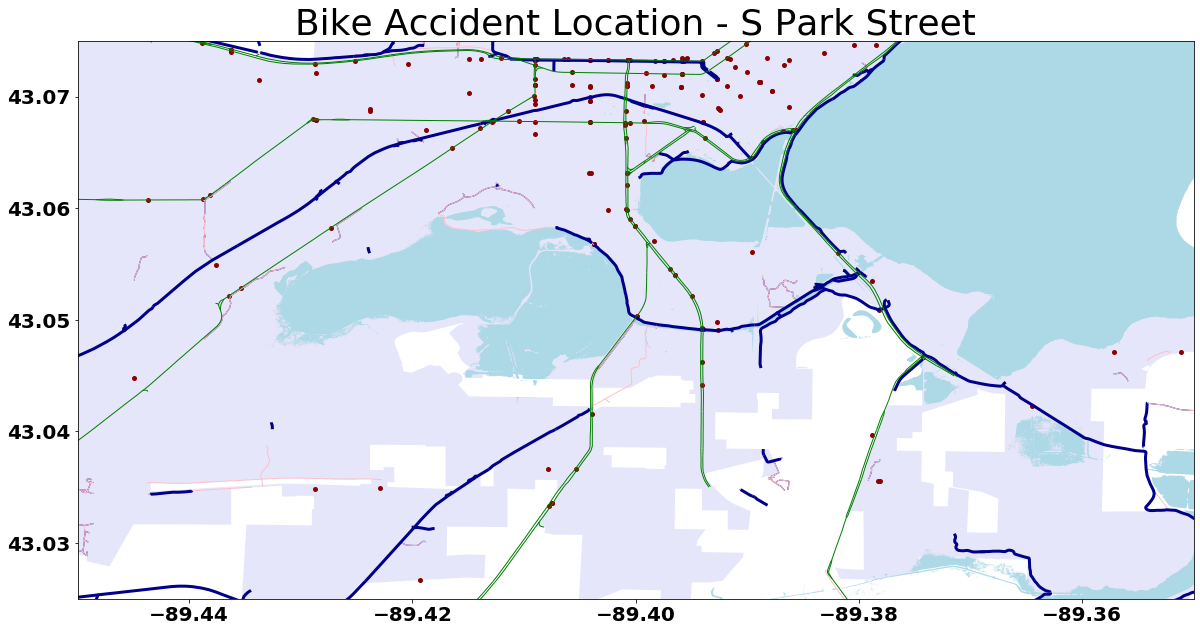

In [276]:
ax = city.plot(color="lavender", figsize=(20,20))
# gdf = geopandas.GeoDataFrame(roads)
# minx, miny, maxx, maxy = gdf.total_bounds
# ax.set_xlim(minx, maxx)
# ax.set_ylim(miny, maxy)
ax.set_xlim(-89.45, -89.35)
ax.set_ylim(43.025, 43.075)
font = {'weight' : 'bold',
        'size'   : 30}
matplotlib.rc('font', **font)
existing_bike_path.plot(color = "darkblue",ax=ax, lw = 1)
plt.title("Bike Accident Location - S Park Street")
ax.tick_params(axis='both', which='major', labelsize=20)
# p = patches.Rectangle((0.5, 0.35), 0.03, 0.1,
#     fill=False, transform=ax.transAxes, clip_on=False
#     ,color="red",lw = 3
#     )
# p2 = patches.Rectangle((0.65, 0.65), 0.1, 0.1,
#     fill=False, transform=ax.transAxes, clip_on=False
#     ,color="red",lw = 3
#     )
# ax.add_patch(p)
# ax.add_patch(p2)

expected_bike_path.plot(color="pink", ax=ax, lw = 1)
lakes.plot(color="lightblue", ax=ax)
cycle_way.plot(color="darkblue", ax = ax, lw = 3)
roads.plot(color = "green",ax=ax, lw = 1)
inj.plot(color = "darkred",ax=ax, lw = 2, marker=".")



Use [Dane County Bike Map](https://cityofmadison.maps.arcgis.com/apps/webappviewer/index.html?id=5d9b5793e6404b8c89872c06bd5f26c2) to check the most recent bike path data.
- This map included bike lane.


# Is there enough room for a new bike lane?
### a. Is it physically possible?
### b. Is it doable according to the traffic heaviness?


In [254]:
traf = geopandas.read_file("Traffic_Flow_Map/Traffic_Flow_Map.shp")
traf["AWT_Count"] = pd.to_numeric(traf["AWT_Count"])
traf.head()

,OBJECTID,mslink,segment_na,STATION,SOURCE,AWT_Count,AWT_Yr,Year_Txt,ShapeSTLen,geometry
0,57710,149,LANCASTER LN,None,None,NaN,None,None,319.745346,"LINESTRING (-89.50430 43.02248, -89.50491 43.0..."
1,57711,150,WILLIAMSBURG WAY,None,None,NaN,None,None,175.561716,"LINESTRING (-89.48390 43.02350, -89.48420 43.0..."
2,57712,151,DANVILLE DR,None,None,NaN,None,None,137.983979,"LINESTRING (-89.48396 43.02034, -89.48401 43.0..."
3,57713,152,DANVILLE DR,None,None,NaN,None,None,280.506770,"LINESTRING (-89.48444 43.02046, -89.48454 43.0..."
4,57714,153,DANVILLE DR,None,None,NaN,None,None,385.619198,"LINESTRING (-89.48507 43.02107, -89.48521 43.0..."


In [255]:
# Average weekday traffic counts Plots
print(len(traf))
#traf=traf[traf["AWT_Count"] == None]
traf = traf[np.isfinite(traf['AWT_Count'])]
print(len(traf))

19497
2890


In [209]:
traf["AWT_Count"].mean()

12183.246618106139

In [231]:
traf = traf[traf["AWT_Count"] > 3000]
print(len(traf))

2148


In [218]:
print(min(traf["AWT_Count"]),max(traf["AWT_Count"]))

3050.0 129700.0


High <----> Low
1  2  3  4  5
14 0 54 285 2535


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


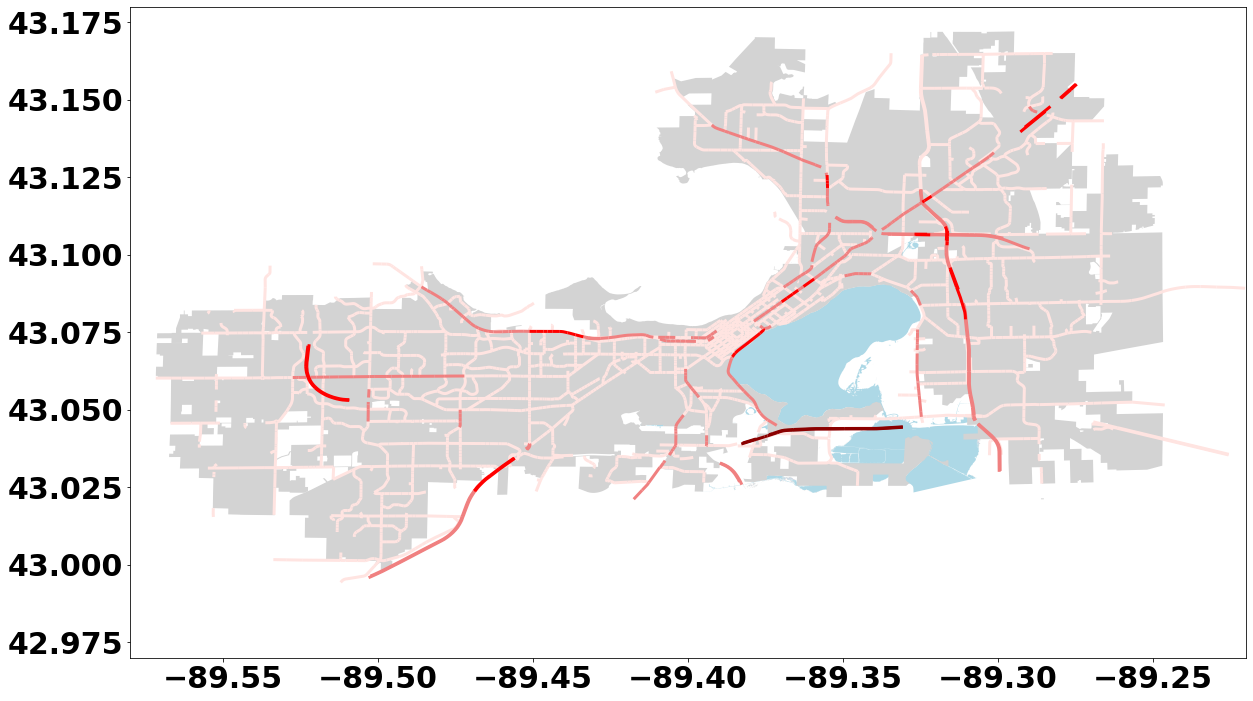

In [280]:
seperate = [ i* (max(traf["AWT_Count"]) - min(traf["AWT_Count"]))/5 +min(traf["AWT_Count"])  for i in range(1,6)]
d5 = traf[traf["AWT_Count"] <= seperate[0]]
d4 = traf[traf["AWT_Count"] <= seperate[1]]
d4 = d4[d4["AWT_Count"] > seperate[0]]
d3 = traf[traf["AWT_Count"] <= seperate[2]]
d3 = d3[d3["AWT_Count"] > seperate[1]]
d2 = traf[traf["AWT_Count"] <= seperate[3]]
d2 = d3[d3["AWT_Count"] > seperate[2]]
d1 = traf[traf["AWT_Count"] <= seperate[4]]
d1 = d1[d1["AWT_Count"] > seperate[3]]
print("High <----> Low")
print("1  2  3  4  5")
print(len(d1),len(d2),len(d3),len(d4),len(d5))
ax1 = d5.plot(color="mistyrose", figsize=(20,20),lw = 3)
gdf1= geopandas.GeoDataFrame(city)
minx, miny, maxx, maxy = gdf.total_bounds
#print(minx,miny,maxx,maxy)
# ax1.set_xlim(-89.5, -89.3)
#ax1.set_ylim(43.04, 43.12)
ax1.set_xlim(minx, maxx)
ax1.set_ylim(miny, maxy)
d4.plot(color="lightcoral",ax = ax1,lw = 3)
d3.plot(color="red",ax = ax1,lw = 3)
d2.plot(color="indianred",ax = ax1,lw = 3)
d1.plot(color="darkred",ax = ax1,lw = 3)
lakes.plot(color="lightblue", ax=ax1)
city.plot(color="lightgrey", ax=ax1)
#inj.plot(color = "Green",ax=ax1, lw = 3, marker=".")

### Note:
from [Blog post of a traffic engineer](http://www.mikeontraffic.com/numbers-every-traffic-engineer-should-know/), theoretical maximum saturation flow rate per lane
- **1,900** vehicles per hour per lane 

# Takeaway
- Without the actually number of lanes of the roads, it is hard to identify which road is more tolerable to make room for the new bike facilities.

- Feedback from Crash-Data team: there is no dataset about how many lane there is for each road.


# Future work
1. Identify the dangerous roads for bikes.
2. Count lane from Google Map and calculate car flow.
3. Collect suitable ones, check cost v.s decreasement to rank.